<a href="https://colab.research.google.com/github/nathandsouza10/trading_bot/blob/experiment/experiment/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

import random

In [154]:
!pip install alpaca-py

In [155]:
device = ('cuda' if torch.cuda.is_available() else 'cpu')
device

'cuda'

In [156]:
np.random.seed(42)
torch.manual_seed(42)
random.seed(42)

In [157]:
from alpaca.data.historical import CryptoHistoricalDataClient
from alpaca.data.requests import CryptoBarsRequest
from alpaca.data.timeframe import TimeFrame
from datetime import datetime

# no keys required for crypto data
client = CryptoHistoricalDataClient()

request_params = CryptoBarsRequest(
                        symbol_or_symbols=["BTC/USD", "ETH/USD", "DAI/USD", "GRT/USD", "BTC/USD", "LINK/USD", "SHIB/USD"],
                        timeframe=TimeFrame.Day,
                        start=datetime(1600, 7, 1),
                        end=datetime(2022, 9, 1)
                 )

bars = client.get_crypto_bars(request_params)

# convert to dataframe
bars.df

open        high         low  \
symbol   timestamp                                                       
BTC/USD  2021-01-01 06:00:00+00:00  29255.7100  29682.2900  28707.5600   
         2021-01-02 06:00:00+00:00  29678.3400  34200.0000  29555.9900   
         2021-01-03 06:00:00+00:00  33769.5200  34812.9300  32300.6100   
         2021-01-04 06:00:00+00:00  32907.3600  33496.0300  27900.0000   
         2021-01-05 06:00:00+00:00  30461.8400  35851.4200  29927.5500   
...                                        ...         ...         ...   
LINK/USD 2022-08-27 05:00:00+00:00      6.5202      6.6077      6.4171   
         2022-08-28 05:00:00+00:00      6.4791      6.6266      6.2025   
         2022-08-29 05:00:00+00:00      6.3368      6.8218      6.2835   
         2022-08-30 05:00:00+00:00      6.7754      6.8321      6.3660   
         2022-08-31 05:00:00+00:00      6.7959      6.8896      6.4967   

                                         close         volume  trade_count  \
symbol   timestamp                                                           
BTC/USD  2021-01-01 06:00:00+00:00  29676.7900     848.874030      29639.0   
         2021-01-02 06:00:00+00:00  33769.5200    2144.592516      60152.0   
         2021-01-03 06:00:00+00:00  32908.0200    1838.695433      58725.0   
         2021-01-04 06:00:00+00:00  30441.5700    2711.189503      69226.0   
         2021-01-05 06:00:00+00:00  35063.0000    1756.751333      61880.0   
...                                        ...            ...          ...   
LINK/USD 2022-08-27 05:00:00+00:00      6.4791   65050.550000       1671.0   
         2022-08-28 05:00:00+00:00      6.3232  109749.980000       2738.0   
         2022-08-29 05:00:00+00:00      6.7760  203058.980000       3068.0   
         2022-08-30 05:00:00+00:00      6.7995  157433.730000       2894.0   
         2022-08-31 05:00:00+00:00      6.5894  103873.340000       2499.0   

                                            vwap  
symbol   timestamp                                
BTC/USD  2021-01-01 06:00:00+00:00  29316.444625  
         2021-01-02 06:00:00+00:00  31941.412694  
         2021-01-03 06:00:00+00:00  33505.269474  
         2021-01-04 06:00:00+00:00  31267.965121  
         2021-01-05 06:00:00+00:00  33151.367357  
...                                          ...  
LINK/USD 2022-08-27 05:00:00+00:00      6.514891  
         2022-08-28 05:00:00+00:00      6.378791  
         2022-08-29 05:00:00+00:00      6.599441  
         2022-08-30 05:00:00+00:00      6.677016  
         2022-08-31 05:00:00+00:00      6.698036  

[2845 rows x 7 columns]

In [158]:
data = bars.df.loc['LINK/USD']
data[['close']]

,close
timestamp,
2021-01-01 06:00:00+00:00,11.7660
2021-01-02 06:00:00+00:00,12.0256
2021-01-03 06:00:00+00:00,15.2500
2021-01-04 06:00:00+00:00,13.2304
2021-01-05 06:00:00+00:00,14.4115
...,...
2022-08-27 05:00:00+00:00,6.4791
2022-08-28 05:00:00+00:00,6.3232
2022-08-29 05:00:00+00:00,6.7760


In [159]:
from sklearn.preprocessing import MinMaxScaler
price = data[['close']]
scaler = MinMaxScaler(feature_range=(0, 1))
price['close'] = scaler.fit_transform(price['close'].values.reshape(-1,1))
price

<ipython-input-159-09b0e32de3f7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price['close'] = scaler.fit_transform(price['close'].values.reshape(-1,1))


,close
timestamp,
2021-01-01 06:00:00+00:00,0.125952
2021-01-02 06:00:00+00:00,0.131596
2021-01-03 06:00:00+00:00,0.201701
2021-01-04 06:00:00+00:00,0.157791
2021-01-05 06:00:00+00:00,0.183470
...,...
2022-08-27 05:00:00+00:00,0.011004
2022-08-28 05:00:00+00:00,0.007614
2022-08-29 05:00:00+00:00,0.017459


In [160]:
def split_data(stock, lookback, test_size=0.2):
    data_raw = stock.to_numpy() # convert to numpy array
    data = []

    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - lookback):
        data.append(data_raw[index: index + lookback])

    data = np.array(data);
    test_set_size = int(np.round(test_size*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);

    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]

    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]

    return x_train, y_train, x_test, y_test
lookback = 10 # choose sequence length
x_train, y_train, x_test, y_test = split_data(price, lookback, test_size=0.3)

x_test.shape

(179, 9, 1)

In [161]:
x_train = torch.from_numpy(x_train).type(torch.Tensor).to(device)
x_test = torch.from_numpy(x_test).type(torch.Tensor).to(device)
y_train_lstm = torch.from_numpy(y_train).type(torch.Tensor).to(device)
y_test_lstm = torch.from_numpy(y_test).type(torch.Tensor).to(device)

In [162]:
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 6000

In [163]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Sequential(
                        nn.Linear(hidden_dim, hidden_dim // 2 ),
                        nn.Tanh(),
                        nn.Linear(hidden_dim // 2, hidden_dim // 4),
                        nn.ReLU(),
                        nn.Linear(hidden_dim // 4, output_dim)
                )


    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_().to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_().to(device)
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :])
        return out

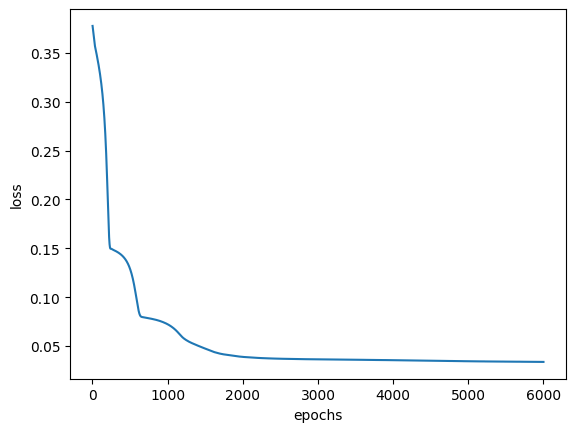

last train loss: 0.03379296511411667


In [164]:
model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
model = model.to(device)
criterion = torch.nn.MSELoss()
optimiser = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)

hist = np.zeros(num_epochs)
for t in range(num_epochs):
    y_train_pred = model(x_train)
    loss = torch.sqrt(criterion(y_train_pred, y_train_lstm))
    hist[t] = loss.item()
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()
plt.plot([i for i in range(1, num_epochs+1)], hist)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()
print(f"last train loss: {hist[-1]}")

In [165]:
with torch.no_grad():
    y_pred = model(x_test)


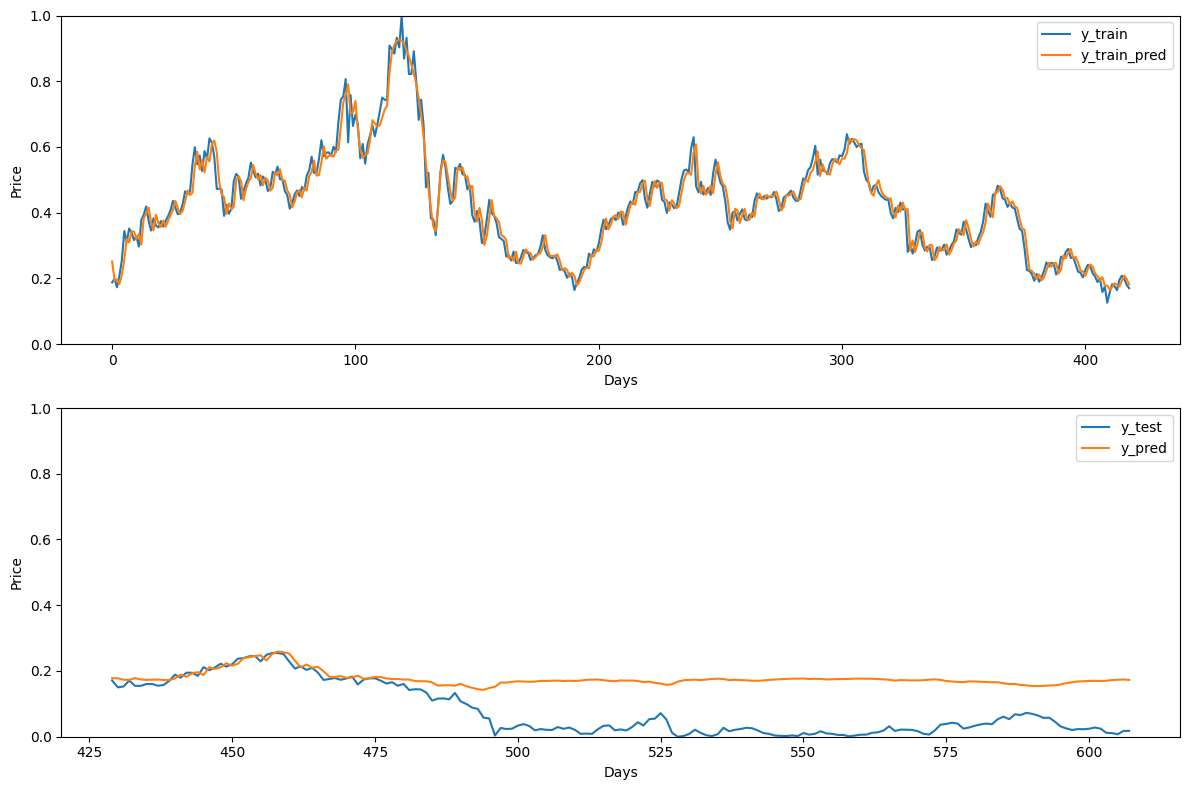

In [166]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

# Plot the first set of graphs in the first subplot
axs[0].plot([i for i in range(0, len(y_train))], y_train, label='y_train')
axs[0].plot([i for i in range(0, len(y_train_pred))], y_train_pred.cpu().detach(), label='y_train_pred')
axs[0].set_xlabel("Days")
axs[0].set_ylabel("Price")
axs[0].legend()
axs[0].set_ylim(0, 1)

# Plot the second set of graphs in the second subplot
axs[1].plot([i for i in range(len(price)-len(x_test), len(price))], y_test, label='y_test')
axs[1].plot([i for i in range(len(price)-len(x_test), len(price))], y_pred.cpu(), label='y_pred')
axs[1].set_xlabel("Days")
axs[1].set_ylabel("Price")
axs[1].legend()
axs[1].set_ylim(0, 1)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()